In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Loading Data
data = pd.read_csv('poem_data.csv')

In [291]:
data.head()

,Genre,Poem,Poem Url
0,Death,On moonlit heath and lonesome bank The sheep b...,https://www.poets.org/poetsorg/poem/shropshire...
1,Death,"“Lights out"" along the land, “Lights out” upon...",https://www.poets.org/poetsorg/poem/lights-out-1
2,Death,I am a garden of red tulips And late daffodils...,https://www.poets.org/poetsorg/poem/prayer-11
3,Death,"New moon in midheaven, in Libra. The hermit wi...",https://www.poets.org/poetsorg/poem/entry-003-...
4,Death,All the hills and vales alongEarth is bursting...,https://www.poets.org/poetsorg/poem/all-hills-...


In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
Genre       999 non-null object
Poem        999 non-null object
Poem Url    998 non-null object
dtypes: object(3)
memory usage: 23.5+ KB


In [297]:
data.columns

Index(['Genre', 'Poem', 'Poem Url'], dtype='object')

In [298]:
#Count of Each Genre
data['Genre'].value_counts()

Audio     254
Nature    253
Death     250
Love      242
Name: Genre, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


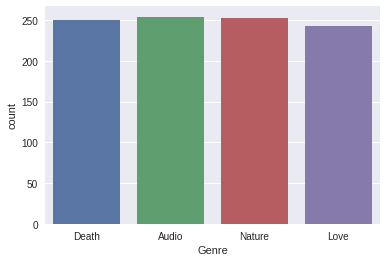

In [299]:
sns.countplot(data['Genre'])

In [0]:
#Spacy for textual Preprocessing

import spacy

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
import string
punc = string.punctuation + '“”|”'

In [0]:

def remove_stop_words(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

def to_lower(text):
    return text.lower()

def remove_punc(text):
    for i in punc:
        text = text.replace(i,"")
    return text

In [0]:
# Converting poem to lowercase
data['Poem'] = data['Poem'].apply(to_lower)

In [0]:
# Removing Punctuations
data['Poem'] = data['Poem'].apply(remove_punc)

In [306]:
data.head()

,Genre,Poem,Poem Url
0,Death,on moonlit heath and lonesome bank the sheep b...,https://www.poets.org/poetsorg/poem/shropshire...
1,Death,lights out along the land lights out upon the ...,https://www.poets.org/poetsorg/poem/lights-out-1
2,Death,i am a garden of red tulips and late daffodils...,https://www.poets.org/poetsorg/poem/prayer-11
3,Death,new moon in midheaven in libra the hermit wiel...,https://www.poets.org/poetsorg/poem/entry-003-...
4,Death,all the hills and vales alongearth is bursting...,https://www.poets.org/poetsorg/poem/all-hills-...


In [0]:
# Tokenization and Lemmatization
data['Tokens'] = data['Poem'].apply(remove_stop_words)

In [308]:
data.head()

,Genre,Poem,Poem Url,Tokens
0,Death,on moonlit heath and lonesome bank the sheep b...,https://www.poets.org/poetsorg/poem/shropshire...,moonlit heath lonesome bank sheep graze yon ga...
1,Death,lights out along the land lights out upon the ...,https://www.poets.org/poetsorg/poem/lights-out-1,light land light sea night hide hand o’er peac...
2,Death,i am a garden of red tulips and late daffodils...,https://www.poets.org/poetsorg/poem/prayer-11,garden red tulip late daffodil bayhedg small s...
3,Death,new moon in midheaven in libra the hermit wiel...,https://www.poets.org/poetsorg/poem/entry-003-...,new moon midheaven libra hermit wield sword te...
4,Death,all the hills and vales alongearth is bursting...,https://www.poets.org/poetsorg/poem/all-hills-...,hill val alongearth burst songand singer chaps...


In [0]:
# EXtracting features and targets
X = data['Tokens']
y = data['Genre']

In [311]:
#Checking Null values
data.isnull().sum()

Genre       0
Poem        0
Poem Url    1
Tokens      0
dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Splitting Data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

In [0]:
# Importing required Libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [315]:
X_train[0]

'moonlit heath lonesome bank sheep graze yon gallow clank fast cross waysa careless shepherd flock moonlight high glimmer sheep'

In [0]:
# Grid Search CV to find the best parameters
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [0]:
# using TFIDF on X_train
vec = TfidfVectorizer(min_df=2,max_df=0.95)

X_train = vec.fit_transform(X_train)

In [318]:
# Finding best parameter for SVC()
svc_param_selection(X_train,y_train,20)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 0.001}

In [0]:
# Again Random Split of Data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

In [0]:
# Creating Pipeline -->
poem_clf = Pipeline([
               ("Tfidf", TfidfVectorizer(min_df = 2,max_df = 0.95)),
                ("ToDense",FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
                ("Classifier",LogisticRegression(penalty = 'l1',C = 1))
])

In [320]:
# Fitting Poem_clf pipeline with data
poem_clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('Tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True...penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [256]:
pred = poem_clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [321]:
# Confusion Matrix
print(confusion_matrix(y_test,pred))

[[39  9  3 11]
 [26 24  9 14]
 [18  5 20 15]
 [22  2  3 30]]


In [332]:
print(f"Accuracy for Logistic Regression is: {accuracy_score(y_test,pred) * 100}%")

Accuracy for Logistic Regression is: 45.2%


In [0]:
poem_clf2 = Pipeline([
                ("Tfidf", TfidfVectorizer(min_df = 2,max_df = 0.95)),
                ("ToDense",FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
                ("Classifier",SVC(kernel = 'linear'))
])

In [334]:
poem_clf2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('Tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [335]:
pred2 = poem_clf2.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [336]:
print(confusion_matrix(y_test,pred2))

[[29 20  6  7]
 [24 25  9 15]
 [17  7 22 12]
 [17  8  5 27]]


In [339]:
print(f"Accuracy for SVC is: {round(accuracy_score(y_test,pred2) * 100,3)}%")

Accuracy for SVC: 41.2%


So we see Logistic Regression is better in this case

Let's try to do topic modelling using Latent Dirichlet Allocation

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

In [342]:
X_train.head()

710    night come everdarken shape seem— grope eerie ...
392                                    try wave not wave
919    beautiful exactly beautiful inexactly let weed...
301    island see castle castle see island people liv...
266    daygod madesometh upthen come second sex andbe...
Name: Tokens, dtype: object

In [0]:
# Vectorization-->
vect = CountVectorizer(min_df = 2,max_df = 0.95,stop_words = 'english')

In [0]:
dtm = vect.fit_transform(X_train)
dtm2 = vect.transform(X_test)

In [0]:
#n_components = 4 for 4 genres
LDA = LatentDirichletAllocation(n_components = 4)

In [0]:
ans = LDA.fit_transform(dtm)
ans2 = LDA.transform(dtm2)

In [349]:
ans.shape

(749, 4)

In [0]:
# Prediction of classes according to LDA
Y_train = ans.argmax(axis = 1)
Y_test = ans2.argmax(axis = 1)

In [0]:
poem_LDA_clf = Pipeline([
                ("Tfidf", TfidfVectorizer(min_df = 2,max_df = 0.95)),
                ("ToDense",FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
                ("Classifier",SVC(gamma = 0.0001,kernel = 'linear'))
])

In [352]:
poem_LDA_clf.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('Tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [353]:
pred3 = poem_LDA_clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [357]:
print(f'Accuracy using SVC is: {accuracy_score(Y_test,pred3) * 100}%')

Accuracy using SVC is: 76.8%


In [0]:
poem_LDA_clf2 = Pipeline([
                ("Tfidf", TfidfVectorizer(min_df = 2,max_df = 0.95)),
                ("ToDense",FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
                ("Classifier",LogisticRegression(penalty = 'l2'))
])

In [359]:
poem_LDA_clf2.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('Tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [361]:
pred4 = poem_LDA_clf2.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [363]:
print(f"Accuracy for Logistic Regression is: {accuracy_score(Y_test,pred4) * 100}%")

Accuracy for Logistic Regression is: 68.8%
